# 과제 1번

import library, get train, test data

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv("./train.csv")
# test = pd.read_csv("test.csv")

결측치 처리


In [4]:
train.Age = train['Age'].fillna(train.Age.mean())
train = train.drop(columns='Cabin', axis = 1)
train.Embarked = train['Embarked'].fillna('C')

Sex는 female = 0, male = 1로,

Embarked는 S = 0, C = 1, Q = 2로 인코딩

In [5]:
train = train.assign(Sex = [1 if s == 'male' else 0 for s in train.Sex])
train = train.assign(Embarked = [0 if (x == 'S') else (1 if x == 'C' else 2) for x in train.Embarked])

필요없는 자료 drop, 75%, 25%로 데이터 분할

Train, Validation accuracy 확인

In [6]:
drop_cols = ['PassengerId', 'Name', 'Ticket']
train = train.drop(columns = drop_cols)

In [7]:
from sklearn.model_selection import train_test_split

X = train.drop('Survived', axis = 1)
y = train['Survived']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.25)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(668, 7) (223, 7) (668,) (223,)


In [8]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

pred_train = clf.predict(X_train)
pred_val = clf.predict(X_val)

print("Train ACC : %.4f" % accuracy_score(y_train, pred_train))
print("Validation ACC : %.4f" % accuracy_score(y_val, pred_val))

Train ACC : 0.9850
Validation ACC : 0.8027


# 과제 2번

In [30]:
train = pd.read_csv("./train.csv")

<Axes: xlabel='Age', ylabel='Count'>

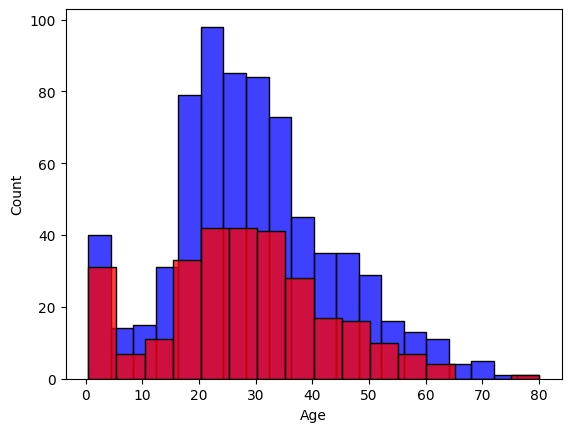

In [21]:
train_survived = train[train.Survived == 1]

sns.histplot(train.Age, color = 'blue')
sns.histplot(train_survived.Age, color = 'red')

위의 히스토크램은 전체 연령분포인데, 실제 데이터 중 생존한 사람의 연령 비율을 살펴보고 싶었다.

어린이의 생존비율이 높은것이 눈에 띈다.

이외에는 생존비율에 큰 차이가 없어보인다.

다음은 성별을 구분하고 살펴보고 싶다.

<Axes: xlabel='Age', ylabel='Count'>

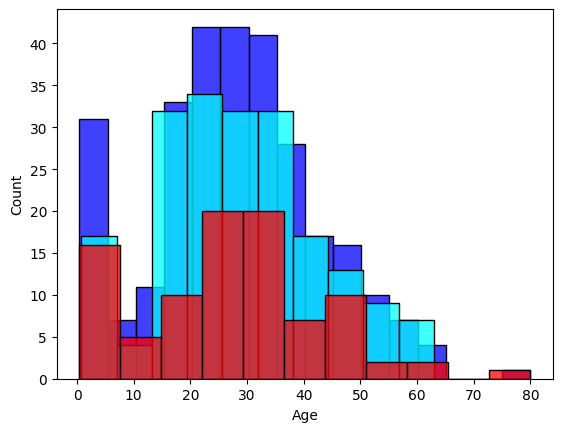

In [24]:
survived_male = train_survived[train_survived.Sex == 'male']
survived_female = train_survived[train_survived.Sex == 'female']

sns.histplot(train_survived.Age, color = 'blue')
sns.histplot(survived_female.Age, color = 'cyan')
sns.histplot(survived_male.Age, color = 'red')

생존자 중 여성은 15세 이상의 생존비율이 눈에 띄게 높고,
남성은 15세~45세의 생존비율이 낮은 모습을 볼 수 있다.


따라서 15세, 30세, 45세를 분기로 네 나이대로 구분하고 싶다.

이들은 순서가 있으니, ordinal encoding 했다.

In [31]:
train.loc[train.Age < 15, 'Age'] = 0
train.loc[(train.Age >= 15) & (train.Age < 30), 'Age'] = 1
train.loc[(train.Age >= 30) & (train.Age < 45), 'Age'] = 2
train.loc[train.Age >= 45, 'Age'] = 3

# 과제 3번


GridSearchCV를 이용하여 최적의 파라미터를 찾자.

이때 사용할 데이터는 Embarked는 C로 채운 후, one-hot encoding, Age는 평균으로 결측값을 채우고, 15/30/45로 구분해 Ordinal encoding, Sex는 0-1으로 인코딩하여 사용하겠다.

In [34]:
train = pd.read_csv("./train.csv")

train.Age = train['Age'].fillna(train.Age.mean())
train.loc[train.Age < 15, 'Age'] = 0
train.loc[(train.Age >= 15) & (train.Age < 30), 'Age'] = 1
train.loc[(train.Age >= 30) & (train.Age < 45), 'Age'] = 2
train.loc[train.Age >= 45, 'Age'] = 3
train = train.drop(columns='Cabin', axis = 1)
train.Embarked = train['Embarked'].fillna('C')
train = train.assign(Sex = [1 if s == 'male' else 0 for s in train.Sex])
train = train.assign(EmbarkedS = [1 if x == 'S' else 0 for x in train.Embarked])
train = train.assign(EmbarkedC = [1 if x == 'C' else 0 for x in train.Embarked])
train = train.assign(EmbarkedQ = [1 if x == 'Q' else 0 for x in train.Embarked])
drop_cols = ['PassengerId', 'Name', 'Ticket', 'Embarked']
train = train.drop(columns = drop_cols)

train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,EmbarkedS,EmbarkedC,EmbarkedQ
0,0,3,1,1.0,1,0,7.2500,1,0,0
1,1,1,0,2.0,1,0,71.2833,0,1,0
2,1,3,0,1.0,0,0,7.9250,1,0,0
3,1,1,0,2.0,1,0,53.1000,1,0,0
4,0,3,1,2.0,0,0,8.0500,1,0,0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,1.0,0,0,13.0000,1,0,0
887,1,1,0,1.0,0,0,30.0000,1,0,0
888,0,3,0,1.0,1,2,23.4500,1,0,0
889,1,1,1,1.0,0,0,30.0000,0,1,0


In [35]:
from sklearn.model_selection import train_test_split

X = train.drop('Survived', axis = 1)
y = train['Survived']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.25)

In [48]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [3, 4, 5, 6],
    'max_features' : ["sqrt", "log2"],
    'n_estimators' : [60, 75, 85],
    'max_leaf_nodes' : [None, 5, 7, 10],
    'criterion' : ["gini", "entropy", "log_loss"]
}

RFC = RandomForestClassifier()
RandForestGS = GridSearchCV(RFC, param_grid = params)
RandForestGS.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 4, 5, 6],
                         'max_features': ['sqrt', 'log2'],
                         'max_leaf_nodes': [None, 5, 7, 10],
                         'n_estimators': [60, 75, 85]})

In [49]:
print('best parameters : ', RandForestGS.best_params_)
print('best score : ', RandForestGS.best_score_)

from sklearn.metrics import accuracy_score

pred_train = RandForestGS.predict(X_train)
pred_val = RandForestGS.predict(X_val)

print("Train ACC : %.4f" % accuracy_score(y_train, pred_train))
print("Validation ACC : %.4f" % accuracy_score(y_val, pred_val))

best parameters :  {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2', 'max_leaf_nodes': None, 'n_estimators': 60}
best score :  0.8323532712377961
Train ACC : 0.8698
Validation ACC : 0.7892
